## Overview

##### Feature explanation

\*\* Features: Sensor input, Segmenting data into T_th sized window
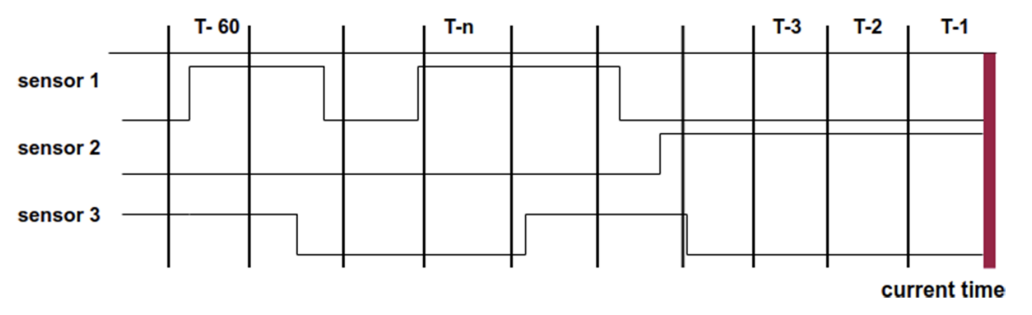

\*\* Labels: activities, multiple fuzzy temporal windows with various size (usually Fibonacci number)

\*\* FTW: [720, 540, 360, 180, 60, 30, 15, 5, 3, 2, 1, 0, 0]

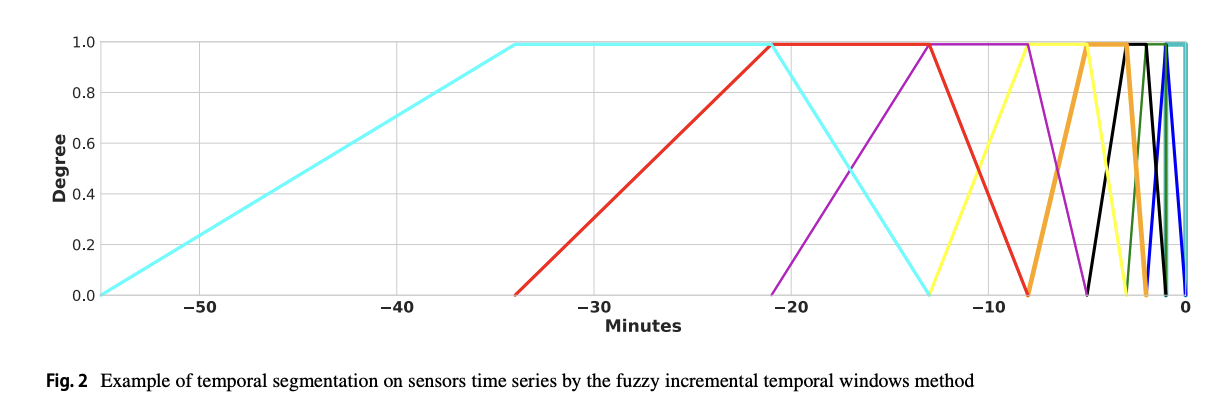

##### Model overview

In [1]:
## Showcase tthe figures from the paper read
## Rememeber to mention about the 1-vs-all classifier
from model import LSTM

input_size = 56 # Input Feature size
n_hidden = 512 # hidden size
n_categories = 1 # Single classification output
n_layer = 3
is_bidirectional = True # if BiLSTM else False

model = LSTM(input_size,n_hidden,n_categories,n_layer,is_bidirectional)
model.to('cuda:0')

/home/simon/miniconda3/envs/casas/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


LSTM(
  (lstm): LSTM(56, 256, num_layers=3, bidirectional=True)
  (fc): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

##### Comparison to the baseline models (CASAS and github repo)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Precision</th>
      <th>Recall</th>
      <th>F1-score</th>
      <th>Accuracy</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Random Forest</th>
      <td>0.6863</td>
      <td>0.6837</td>
      <td>0.6720</td>
      <td>0.6837</td>
    </tr>
    <tr>
      <th>BiLSTM(ori)</th>
      <td>0.7566</td>
      <td>0.7814</td>
      <td>0.7519</td>
      <td>0.7883</td>
    </tr>
    <tr>
      <th>BiLSTM with FTW</th>
      <td><b>0.8159**</td>
      <td><b>0.8269**</td>
      <td><b>0.8169**</td>
      <td></td>
    </tr>
  </tbody>
</table>

Question: Is it appropriate to compare between these methods?

## Detail comparison

##### Comparison between different feature encoding

1. Mean
2. Mean and std
3. Mean with weighted sum

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>positive_f1</th>
      <th>marco_f1</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>mean_feature</th>
      <td>0.6020</td>
      <td>0.7911</td>
    </tr>
    <tr>
      <th>mean_std</th>
      <td>0.5580</td>
      <td>0.7669</td>
    </tr>
    <tr>
      <th>mean_with_weight</th>
      <td>0.6533</td>
      <td>0.8169</td>
    </tr>
  </tbody>
</table>

### Marco_f1 for each activity
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>mean_feature</th>
      <th>mean_std</th>
      <th>mean_with_weight</th>
    </tr>
    <tr>
      <th>activity</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Sleep</th>
      <td><b>0.8365</td>
      <td>0.8299</td>
      <td>0.8340</td>
    </tr>
    <tr>
      <th>Bed_Toilet_Transition</th>
      <td>0.7837</td>
      <td>NaN</td>
      <td><b>0.9495</td>
    </tr>
    <tr>
      <th>Toilet</th>
      <td>0.7549</td>
      <td>0.7392</td>
      <td><b>0.7752</td>
    </tr>
    <tr>
      <th>Take_Medicine</th>
      <td><b>0.8208</td>
      <td>0.7533</td>
      <td>0.7874</td>
    </tr>
    <tr>
      <th>Dress</th>
      <td>0.7344</td>
      <td>0.7334</td>
      <td><b>0.7636</td>
    </tr>
    <tr>
      <th>Work</th>
      <td>0.7968</td>
      <td>0.7979</td>
      <td><b>0.8191</td>
    </tr>
    <tr>
      <th>Cook</th>
      <td><b>0.8289</td>
      <td>0.7798</td>
      <td>0.8253</td>
    </tr>
    <tr>
      <th>Eat</th>
      <td><b>0.8525</td>
      <td>0.8088</td>
      <td>0.8228</td>
    </tr>
    <tr>
      <th>Wash_Dishes</th>
      <td><b>0.7441</td>
      <td>0.7380</td>
      <td><b>0.7441</td>
    </tr>
    <tr>
      <th>Relax</th>
      <td>0.8662</td>
      <td>0.8445</td>
      <td><b>0.8732</td>
    </tr>
    <tr>
      <th>Personal_Hygiene</th>
      <td>0.8149</td>
      <td>0.8163</td>
      <td><b>0.8448</td>
    </tr>
    <tr>
      <th>Bathe</th>
      <td>0.8518</td>
      <td>0.8322</td>
      <td><b>0.8798</td>
    </tr>
    <tr>
      <th>Groom</th>
      <td><b>0.8084</td>
      <td>0.7252</td>
      <td>0.7749</td>
    </tr>
    <tr>
      <th>Drink</th>
      <td>0.6682</td>
      <td>0.6731</td>
      <td><b>0.6955</td>
    </tr>
    <tr>
      <th>Leave_Home</th>
      <td>0.7843</td>
      <td>0.7556</td>
      <td><b>0.9260</td>
    </tr>
    <tr>
      <th>Enter_Home</th>
      <td>0.7111</td>
      <td>0.6766</td>
      <td><b>0.7545</td>
    </tr>
    <tr>
      <th>Mean</th>
      <td>0.7911</td>
      <td>0.7669</td>
      <td><b>0.8169</td>
    </tr>
  </tbody>
</table>


### Positive F1 for each activity
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>mean_feature</th>
      <th>mean_std</th>
      <th>mean_with_weight*</th>
      <th>support</th>
    </tr>
    <tr>
      <th>activity</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Sleep</th>
      <td>0.7301</td>
      <td>0.7238</td>
      <td>0.7311</td>
      <td>178</td>
    </tr>
    <tr>
      <th>Bed_Toilet_Transition</th>
      <td>0.5714</td>
      <td>NaN</td>
      <td>0.9000</td>
      <td>11</td>
    </tr>
    <tr>
      <th>Toilet</th>
      <td>0.5385</td>
      <td>0.5079</td>
      <td>0.5848</td>
              <td>72</td>
    </tr>
    <tr>
      <th>Take_Medicine</th>
      <td>0.6471</td>
      <td>0.5143</td>
      <td>0.5806</td>
              <td>19</td>
    </tr>
    <tr>
      <th>Dress</th>
      <td>0.4865</td>
      <td>0.4894</td>
      <td>0.5474</td>
              <td>45</td>
    </tr>
    <tr>
      <th>Work</th>
      <td>0.6305</td>
      <td>0.6379</td>
      <td>0.6729</td>
              <td>122</td>
    </tr>
    <tr>
      <th>Cook</th>
      <td>0.6733</td>
      <td>0.5833</td>
      <td>0.6667</td>
              <td>57</td>
    </tr>
    <tr>
      <th>Eat</th>
      <td>0.7143</td>
      <td>0.6301</td>
      <td>0.6585</td>
              <td>36</td>
    </tr>
    <tr>
      <th>Wash_Dishes</th>
      <td>0.5063</td>
      <td>0.4932</td>
      <td>0.5063</td>
              <td>37</td>
    </tr>
    <tr>
      <th>Relax</th>
      <td>0.7725</td>
      <td>0.7413</td>
      <td>0.7793</td>
              <td>154</td>
    </tr>
    <tr>
      <th>Personal_Hygiene</th>
      <td>0.6591</td>
      <td>0.6581</td>
      <td>0.7135</td>
              <td>76</td>
    </tr>
    <tr>
      <th>Bathe</th>
      <td>0.7059</td>
      <td>0.6667</td>
      <td>0.7619</td>
              <td>10</td>
    </tr>
    <tr>
      <th>Groom</th>
      <td>0.6250</td>
      <td>0.4643</td>
      <td>0.5614</td>
              <td>25</td>
    </tr>
    <tr>
      <th>Drink</th>
      <td>0.3548</td>
      <td>0.3684</td>
      <td>0.4110</td>
              <td>34</td>
    </tr>
    <tr>
      <th>Leave_Home</th>
      <td>0.5806</td>
      <td>0.5246</td>
      <td>0.8571</td>
              <td>35</td>
    </tr>
    <tr>
      <th>Enter_Home</th>
      <td>0.4364</td>
      <td>0.3673</td>
      <td>0.5200</td>
              <td>24</td>
    </tr>
    <tr>
      <th>Mean</th>
      <td>0.6020</td>
      <td>0.5580</td>
      <td>0.6533</td>
    </tr>
  </tbody>
</table>

* The weight is decay by 0.1 as the window is further away (0.9, 0.8, 0.7...)

##### Comparison between different window size

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>positive_f1</th>
      <th>marco_f1</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>20mins_window</th>
      <td>0.6533</td>
      <td>0.8169</td>
    </tr>
    <tr>
      <th>10mins_window</th>
      <td>0.6234</td>
      <td>0.8049</td>
    </tr>
    <tr>
      <th>5mins_window</th>
      <td>0.6344</td>
      <td>0.8123</td>
    </tr>
    <tr>
      <th>1mins_window</th>
      <td>Running...</td>
      <td></td>
    </tr>
  </tbody>
</table>

##### Comparison of different fuzzy temporal window(FTW) (Paper proposed vs Fibonacci number)
```
Original_FTWs = [720, 540, 360, 180, 60, 30, 15, 5, 3, 2, 1, 0, 0]
Fib_FTWs = [144, 89, 55, 34, 21, 13, 8, 5, 3, 2, 1, 1, 0]
```
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>positive_f1</th>
      <th>marco_f1</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>mean_with_weight</th>
      <td>0.653300</td>
      <td>0.816900</td>
    </tr>
    <tr>
      <th>fib_ftw_feature</th>
      <td>0.656900</td>
      <td>0.819000</td>
    </tr>
    <tr>
      <th>fib_ftw_5mins_feature</th>
      <td>0.550769</td>
      <td>0.770188</td>
    </tr>
    <tr>
      <th>fib_ftw_2mins_feature</th>
      <td>0.506719</td>
      <td>0.749350</td>
    </tr>
  </tbody>
</table>


##### Result by now and outlook
1. Gather data from different testbed, make more data available
2. Could the weight for each FTW be paramemter and different from different activity? (Attention mechanism)
3. Shrink the size for FTW to find the optimial
4. Find way to model the inter-label relation between activities
5. Multi-label classification: "One-vs-all" or "Single model"

### 